## How to Handle ML Project 


In [10]:
!pip install numpy pandas matplotlib seaborn scikit-learn
!pip install opendatasets scikit-learn --updgrade --quiet


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --updgrade


In [11]:
import os 
import matplotlib 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [12]:
ross_df = pd.read_csv('db/train.csv', low_memory=False)
store_df = pd.read_csv('db/store.csv', low_memory=False)
merged_df = ross_df.merge(store_df,how = 'left', on = 'Store')

In [13]:
test_df = pd.read_csv('db/test.csv', low_memory=False)
merged_test_df = test_df.merge(store_df, how = 'left', on = 'Store')

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [15]:
merged_df.duplicated().sum()

np.int64(0)

1. if open is 0 no need of computation 

In [16]:
# check the sales started & ended date
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'], format='%Y-%m-%d')
merged_df.Date.min(), merged_df.Date.max()


(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

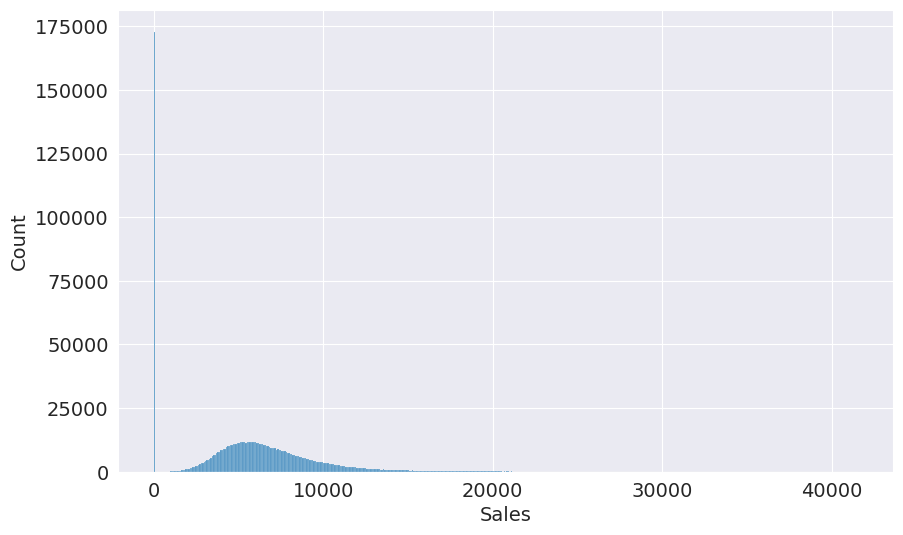

In [17]:
sns.histplot(data=merged_df, x='Sales')

2. count no of time store is open or not 
if we are using decision tree then it is effiecent to use the count but in linear regression it every difficult to counter this 


In [18]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [19]:
merged_df = merged_df[merged_df['Open'] != 0]

merged_df.Open.value_counts()

Open
1    844392
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

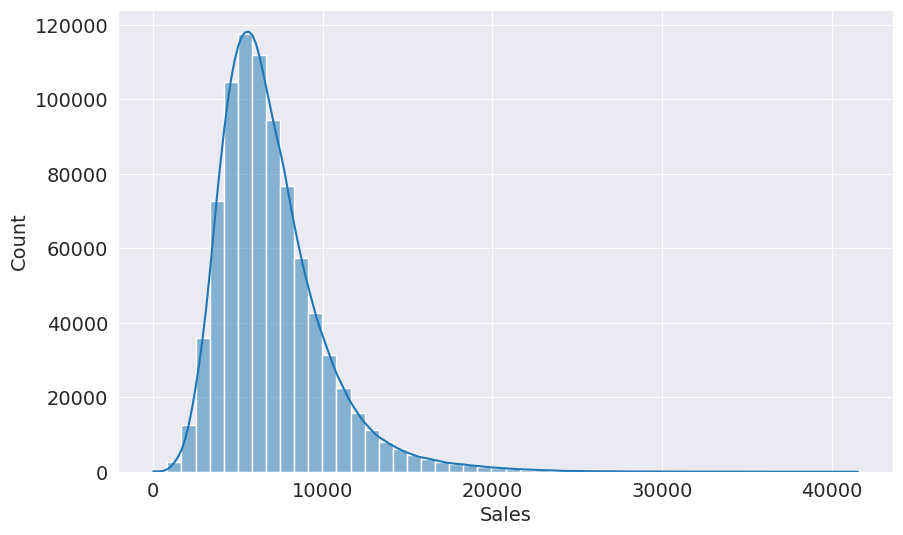

In [20]:
sns.histplot(merged_df['Sales'], bins=50, kde=True)

3. Sales & Store Relation 

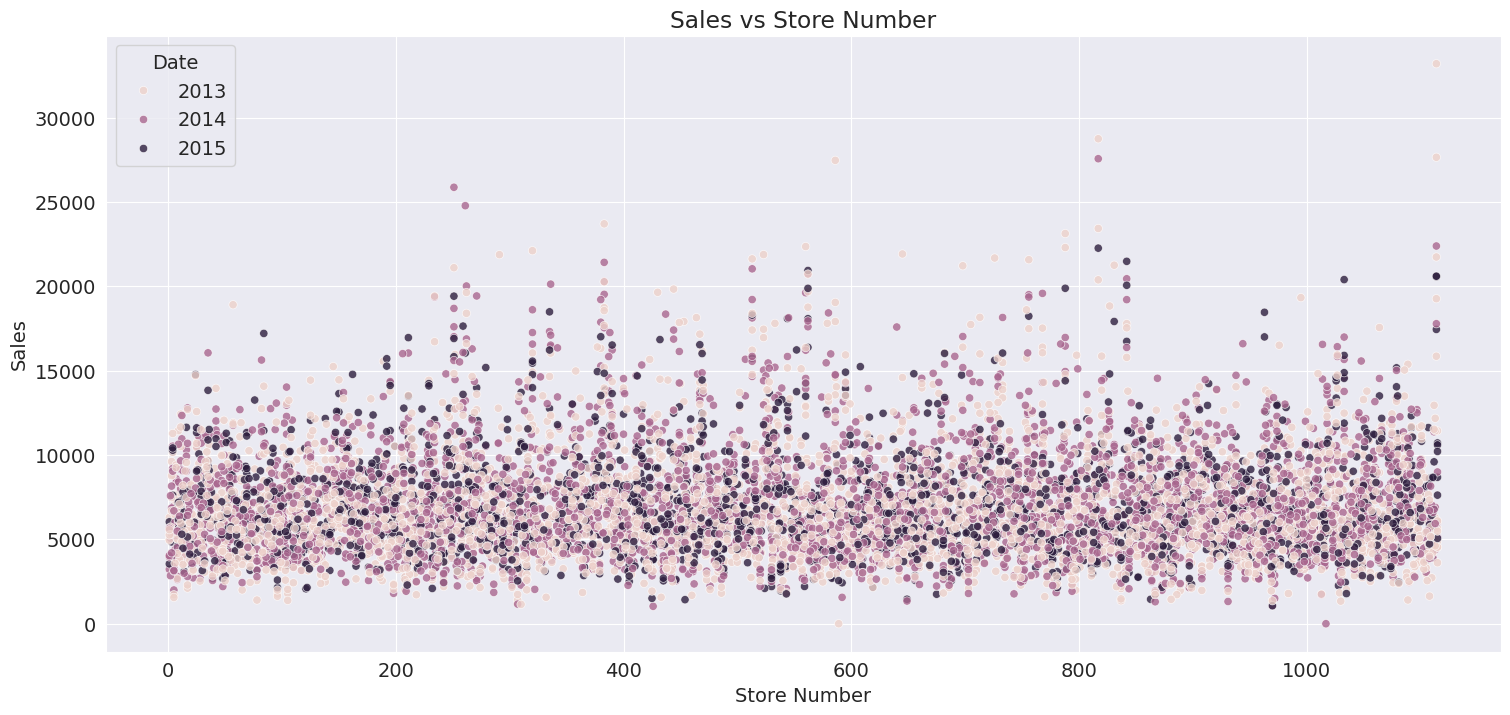

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x= temp_df['Store'], y=temp_df['Sales'], hue = temp_df.Date.dt.year, alpha=0.8)
plt.title('Sales vs Store Number')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

4. differnt days of week 

<Axes: xlabel='Date', ylabel='Sales'>

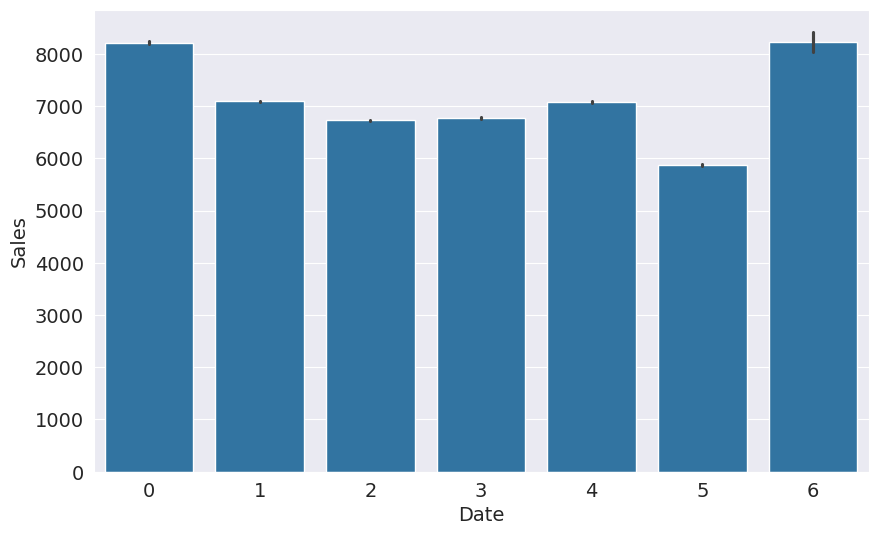

In [22]:
sns.barplot(data=merged_df, x=merged_df['Date'].dt.dayofweek, y='Sales')

5. Average Sales on Promotion 

<Axes: xlabel='Promo', ylabel='Sales'>

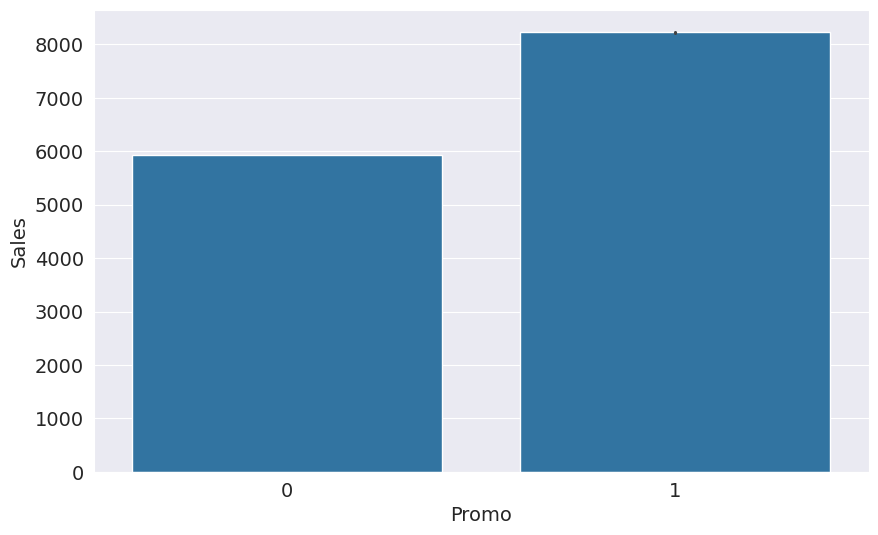

In [23]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [24]:
num = merged_df.select_dtypes(include=[np.number])
cat = pd.get_dummies(merged_df.select_dtypes(include=['object','category']), drop_first=True)
df_corr = pd.concat([num, cat], axis=1)
corr_series = df_corr.corr()['Sales'].sort_values(ascending=False)
corr_series.head(10)

Sales                       1.000000
Customers                   0.823597
Promo                       0.368145
StoreType_b                 0.144608
Assortment_c                0.103280
Promo2SinceWeek             0.095311
Assortment_b                0.053755
SchoolHoliday               0.038617
CompetitionOpenSinceYear    0.016101
StateHoliday_a              0.014154
Name: Sales, dtype: float64

6. Extract Data,Month & year from the day of the sales so that we can see when & why the sales get high

In [25]:
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year


In [26]:
merged_test_df['Day'] = merged_test_df['Date'].dt.day
merged_test_df['Month'] = merged_test_df['Date'].dt.month
merged_test_df['Year'] = merged_test_df['Date'].dt.year

<Axes: xlabel='Month', ylabel='Sales'>

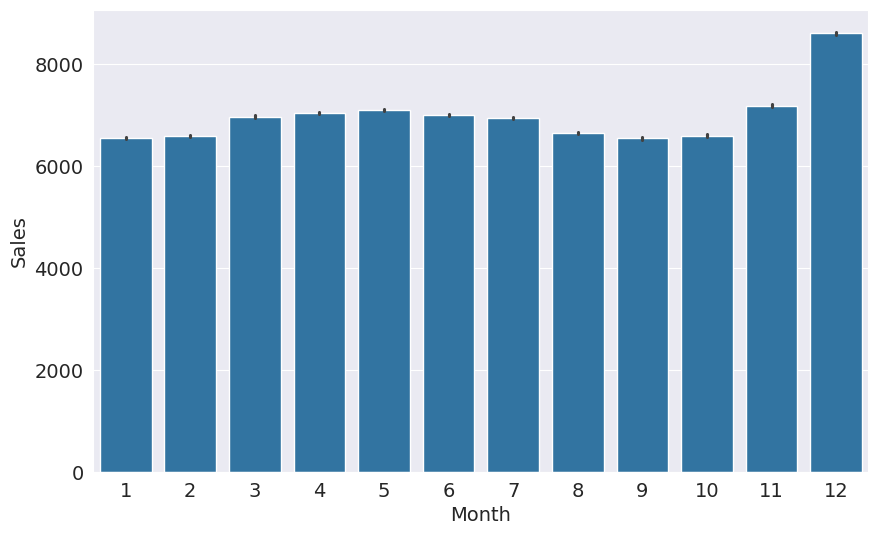

In [27]:
sns.barplot(data= merged_df, x='Month', y='Sales')


<Axes: xlabel='Year', ylabel='Sales'>

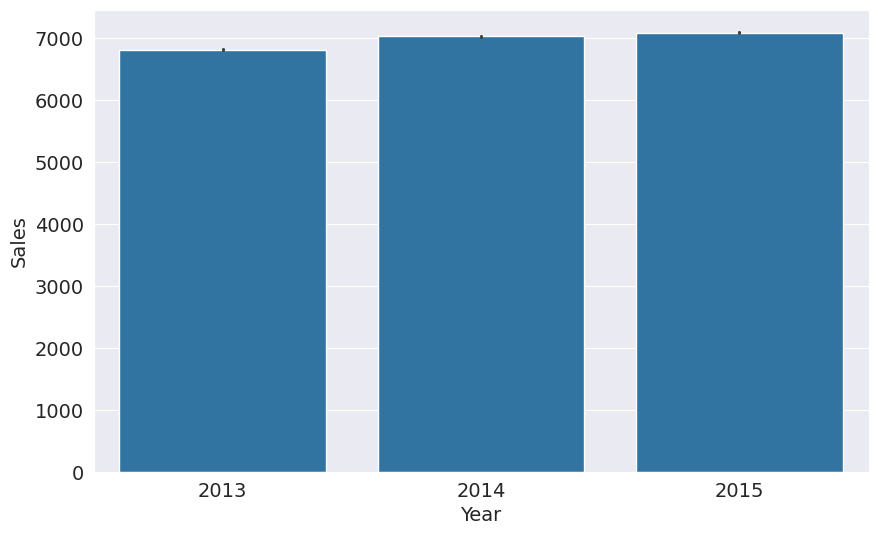

In [28]:
sns.barplot(data= merged_df, x='Year', y='Sales')

# Data Preparation 

1. Train/Test /Validation Split


In [29]:
len(merged_df)
train_size = int(0.7 * len(merged_df))
sorted_df = merged_df.sort_values(by='Date')
train_df,val_df = sorted_df[:train_size], sorted_df[train_size:]
len(train_df), len(val_df)

(591074, 253318)

In [30]:
train_df.Date.min(), train_df.Date.max()
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-10-18 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [31]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [32]:
train_df.columns.tolist()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Day',
 'Month',
 'Year']

2. Input & target Columns

In [33]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday','Assortment','Month','Year','Day']
target_col = 'Sales'

In [34]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
Assortment         3
Month             12
Year               3
Day               31
dtype: int64

3. Numerical & Categorical colums

In [35]:
numeric_cols = ['Store', 'DayOfWeek', 'Promo', 'Month', 'Year', 'Day']
categorical_cols = ['StateHoliday', 'Assortment']

4. Imputation , Scaling & Encode

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_df[numeric_cols])


,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [37]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = merged_test_df[input_cols].copy()
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])


In [39]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [40]:
# ...existing code...
from sklearn.preprocessing import OneHotEncoder

# use sparse_output=False for newer sklearn, or sparse=False if older
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# transform train/val/test and keep original indices
train_cat = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]), columns=encoded_cols, index=train_inputs.index)
val_cat   = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]),   columns=encoded_cols, index=val_inputs.index)
test_cat  = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]),  columns=encoded_cols, index=test_inputs.index)

# drop original categorical columns and concatenate encoded columns
train_prepared = pd.concat([train_inputs.drop(columns=categorical_cols), train_cat], axis=1)
val_prepared   = pd.concat([val_inputs.drop(columns=categorical_cols),   val_cat],   axis=1)
test_prepared  = pd.concat([test_inputs.drop(columns=categorical_cols),  test_cat],  axis=1)
# ...existing code...

In [41]:
# ensure encoded_cols is defined from the OneHotEncoder step
cols = numeric_cols + encoded_cols

# sanity check
missing = [c for c in cols if c not in train_prepared.columns]
if missing:
    raise KeyError(f"Missing columns in prepared data: {missing}")

# correct assignments (note X_test capitalized)
X_train = train_prepared[cols]
X_val   = val_prepared[cols]
X_test  = test_prepared[cols]

In [42]:
X_train.columns.tolist()

['Store',
 'DayOfWeek',
 'Promo',
 'Month',
 'Year',
 'Day',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

# BaseLine Models

1. Mean

In [43]:
def return_mean(inputs): 
    return np.full(len(inputs), merged_df.Sales.mean())

In [44]:
train_preds = return_mean(X_train)

2. RMSE 

In [45]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

train_rmse = root_mean_squared_error(train_targets, train_preds)
val_rmse = root_mean_squared_error(val_df.Sales, return_mean(X_val))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")


Train RMSE: 3074.0320
Validation RMSE: 3173.5187


In [46]:
def guess_random(inputs):
    lo, hi = 3000, 15000
    return np.random.random(len(inputs)) * (hi - lo) + lo

train_preds = guess_random(X_train)
train_preds

array([10200.44038676, 10436.7161893 ,  6424.98628397, ...,
        4051.45499487,  9318.25236049,  9480.25432301], shape=(591074,))

3. Hand coded Strategies
 * if the store is closed return 0 ;
 * if the store is open , return the average sales of the store for the current month in the previous year.

## BaseLine ML Model 

1. Linear Regression 

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, train_targets)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
train_preds = linreg.predict(X_train)
train_preds

array([8073.82250104, 6185.45670985, 8010.72623488, ..., 6099.84574654,
       5521.79264316, 6099.69515879], shape=(591074,))

In [49]:
from sklearn.metrics import root_mean_squared_error

train_rmse = root_mean_squared_error(train_targets, train_preds)
train_rmse

2813.9832421773954

# Model trainig & Evaluation 

In [50]:
# fuction to check each model performance
def try_model(model):
    model.fit(X_train, train_targets)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_rmse = root_mean_squared_error(val_df.Sales, val_preds)
    
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")

In [51]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet, SGDRegressor

In [52]:
try_model(LinearRegression())

Train RMSE: 2813.9832
Validation RMSE: 2897.3504


In [53]:
try_model(Ridge())

Train RMSE: 2813.9833
Validation RMSE: 2897.3526


In [54]:
try_model(Lasso())

Train RMSE: 2814.2507
Validation RMSE: 2898.9046


In [55]:
try_model(ElasticNet())

Train RMSE: 2931.4523
Validation RMSE: 3040.6474


In [56]:
try_model(SGDRegressor())

Train RMSE: 2814.7152
Validation RMSE: 2899.5495


3. Tree Based Models 

In [57]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor



In [59]:
tree = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=2, random_state=42)
try_model(rf)

Train RMSE: 942.2780
Validation RMSE: 1754.3323


## Regularizaton & Ensembling 

* Try strategies like grid search for khyperparameter optimization & k-fold cross validation 
* Combine results from different types o models(ensembling), or train another model using their results.

1.Hyperparameter Optimization & Grid Search

2. Ensembling & Stacking 

## Interpretation & Presenting

<Axes: ylabel='None'>

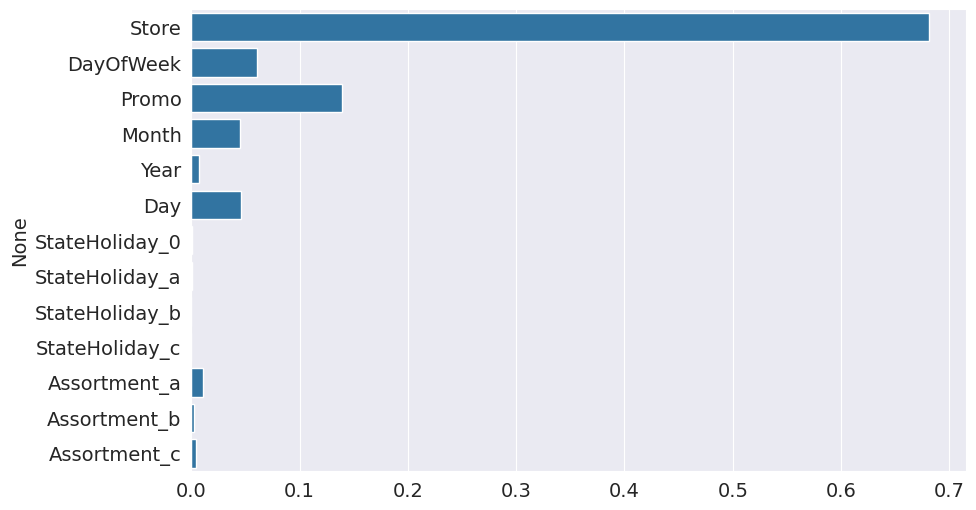

In [61]:
X_train.columns
rf.feature_importances_
sns.barplot(y=X_train.columns, x=rf.feature_importances_)

In [62]:
def predict_input(model,single_input):
    if single_input['Open'] == 0:
        return 0
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df['Date'].dt.day
    input_df['Month'] = input_df['Date'].dt.month
    input_df['Year'] = input_df['Date'].dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_encoded = pd.DataFrame(encoder.transform(input_df[categorical_cols]), columns=encoded_cols)
    X_input = pd.concat([input_df.drop(columns=categorical_cols + ['Date']), input_encoded], axis=1)
    pred = model.predict(X_input)[0]
    return pred